#                                 SMRITI OJHA 

# TASK 1 : Prediction using Supervised ML 

## Problem- To predict the percentage of a student based on the no. of study hours.
##                  What will be predicted score if a student studies for 9.25 hrs/ day?
                 

## Simple Linear Regression task- 2 variables involved


### > IMPORTING AND READIND OF DATA


In [40]:
# IMPORTING ALL THE LIBARARIES REQUIRED FOR TASK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#READING THE DATA
LINK= "http://bit.ly/w-data"
data= pd.read_csv(LINK)    #READING THE FILE THROUGH THE LINK
print("Data Imported")
data.head()                #DISPLAYS FEW ROWS OF THE DATASET

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
data.shape                 #Shows the no. of rows and columns in dataset

(25, 2)

### > STATISTICALLY DESCRIBING THE DATA

In [43]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### > CHECKING FOR MISSING VALUES

In [44]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### > GRAPHING THE DATA

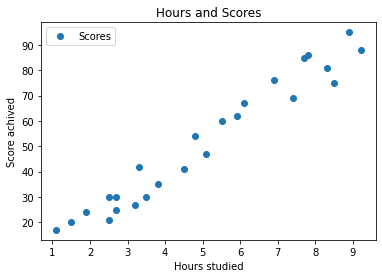

In [45]:
# PLOTTING THE DISTRIBUTION OF SCORES
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours and Scores')                 #giving title to graph
plt.xlabel('Hours studied')                   #x axis label
plt.ylabel('Score achived')                   #y axis label
plt.show()

##### Graph shows a linear relationship between the two variables

### > CHECKING WHETHER VARIABLES ARE NORMALLY DISTRIBUTED

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

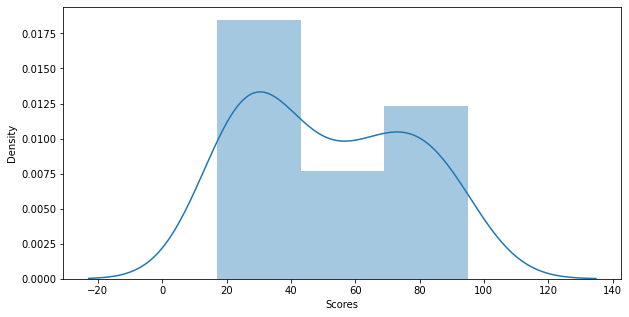

In [46]:
import seaborn as sb
plt.figure(figsize=(10,5))
plt.tight_layout()
sb.distplot(data['Scores'])

#### Data is normally distributed

### > SPLITTING DATA INTO TRAINING AND TESTING

In [47]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

###  >MODEL BUILDING

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
print(x_test)                  #TESTING THE DATA
y_pred= lm.predict(x_test)     #PREDICTING THE SCORES

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
# COMPARING ACUTAL AND PREDICTED VALUES
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### > MODEL EVALUATION

In [58]:
import sklearn.metrics as metrics

r2=r2_score(y_test,y_pred)
print('R SQUARE =', r2)

meanabs_error= metrics.mean_absolute_error(y_test, y_pred)
print("MEAN ABSOLUTE ERROR =", meanabs_error)

meansq_error=mean_squared_error(y_test, y_pred)
print("MEAN SQYARED ERROR =", meansq_error)

rootmeansq_error= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("ROOT MEAN SQUARED ERROR", rootmeansq_error)


R SQUARE = 0.9454906892105356
MEAN ABSOLUTE ERROR = 4.183859899002975
MEAN SQYARED ERROR = 21.5987693072174
ROOT MEAN SQUARED ERROR 4.6474476121003665


### > TESTING FOR 9.25 HOURS/DAY

In [59]:
hours= np.array(9.25)
hours= hours.reshape((-1,1))
prediction= lm.predict(hours)
print("No. of hours =", format(hours))
print("predicted score", format(prediction[0]))

No. of hours = [[9.25]]
predicted score 93.69173248737538
